<b>This notebook contains the implementation of multiple linear regression in Python.</b>

In [1466]:
#required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1467]:
#loading the dataset
df = pd.read_csv("ex.csv", header=None)
df.columns = ['size','rooms','price']
df.head()


,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


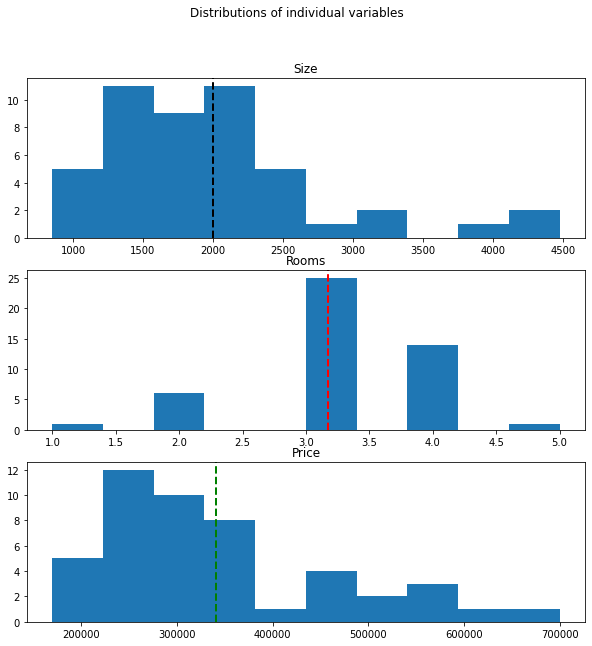

In [1468]:
#Vizualizing data
fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle("Distributions of individual variables")

axs[0].set_title("Size")
axs[0].hist(df.iloc[:,0])
axs[0].axvline(df.iloc[:,0].mean(), color='k', ls='--', lw=2)

axs[1].set_title("Rooms")
axs[1].hist(df.iloc[:,1])
axs[1].axvline(df.iloc[:,1].mean(),color='r', ls="--", lw=2)


axs[2].set_title("Price")
axs[2].hist(df.iloc[:,2])
axs[2].axvline(df.iloc[:,2].mean(),color='g', ls="--", lw=2)


In [1469]:
#Correlation between the attributes
df.corr()

#Price and size are highly correlated

,size,rooms,price
size,1.000000,0.559967,0.854988
rooms,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


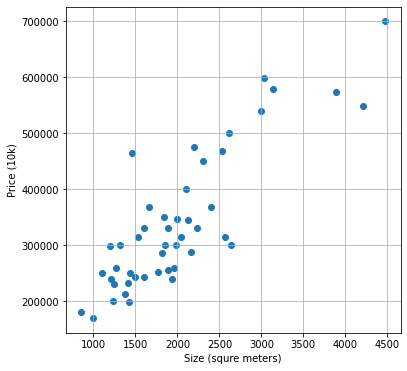

In [1470]:
#Vizualize data using scatetr plot size vs price
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0],df.iloc[:,2])
plt.xlabel('Size (squre meters)')
plt.ylabel('Price (10k)')
plt.grid(True)



In [1471]:
#Dataset preparation for LR


#select all attributes except last
X = np.array(df.iloc[:,:-1])


#select last arrtibute
y = np.array(df.iloc[:,-1])

#num of training examples
m = y.size

#num of attributes
n = X.shape[1]

In [1472]:
#Feature Scaling

def feature_scaling (X):
    
    x_mean = X.mean (axis=0)
    x_std = X.std (axis=0)

    X_norm = (X - x_mean) / x_std

    return X_norm, x_mean, x_std

In [1473]:
#Obtain predictions
def predict(X, theta_in):
 
    y_hat = np.dot(X, theta_in)
    return y_hat

In [1474]:
#Compute cost
def compute_cost(y, y_hat, m):
    
    cost = float( np.sum( (y_hat-y)**2 ) * (1./(2*m)))

    return cost

In [1475]:
#Gradient Descent
def gradient_discent(X, y, alpha, num_iter):

    cost_history = []

    #initialize theta
    theta_fin = np.zeros((X.shape[1]+1,1))

    #feature scaling
    X, mu, sigma = feature_scaling (X)
    

    #Adding all-ones column to X 
    X = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)

    
    #get prediction and compute cost for each iteration
    for i in range(1,num_iter+1):

        #prediction
        y_hat = predict(X, theta_fin)

        #Simulataniously update all theta
        for idx, j in enumerate(theta_fin):

            #Compute gradients
            #note - be sure that y_hat, y and X[:,idx] has the same shape
            gradient =   np.sum ( (y_hat.reshape(m,) - y) *  X[:,idx] ) *(1/m) 

            #Update theta
            theta_updated = j - (alpha * gradient)
            
            theta_fin [idx] = theta_updated
            


        #compute new cost with updated theta
        y_hat_new = predict(X, theta_fin)
        new_cost = compute_cost(y, y_hat_new.reshape(m,1), m)

        cost_history.append(new_cost)
    
        print("Iteration : ",i, "cost : ",new_cost)

    return cost_history, theta_fin, mu, sigma, X, y, y_hat_new




In [1476]:
# Let's see how this works
#Setup params
alpha = 0.02
num_iter = 1500
history, params, mu, sigma, X_df, y_df, y_pred = gradient_discent (X, y, alpha, num_iter)

Iteration :  1 cost :  2975158305734.1646
Iteration :  2 cost :  2872149087940.749
Iteration :  3 cost :  2773572547030.76
Iteration :  4 cost :  2679235218567.895
Iteration :  5 cost :  2588952310829.2725
Iteration :  6 cost :  2502547301926.894
Iteration :  7 cost :  2419851556448.647
Iteration :  8 cost :  2340703960629.588
Iteration :  9 cost :  2264950575116.6064
Iteration :  10 cost :  2192444304439.0781
Iteration :  11 cost :  2123044582344.8743
Iteration :  12 cost :  2056617072205.3245
Iteration :  13 cost :  1993033381734.4946
Iteration :  14 cost :  1932170791307.6768
Iteration :  15 cost :  1873911995201.321
Iteration :  16 cost :  1818144855111.9736
Iteration :  17 cost :  1764762165345.1914
Iteration :  18 cost :  1713661429096.9912
Iteration :  19 cost :  1664744645280.2815
Iteration :  20 cost :  1617918105377.0046
Iteration :  21 cost :  1573092199823.4587
Iteration :  22 cost :  1530181233461.5884
Iteration :  23 cost :  1489103249612.9907
Iteration :  24 cost :  1449

Text(0.5, 1.0, 'Cost')

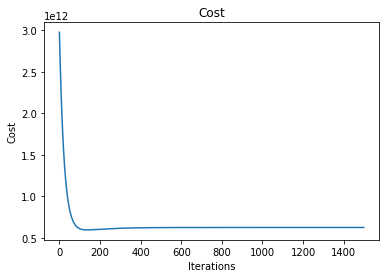

In [1477]:
#Illustrate how the cost function converges 
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost")

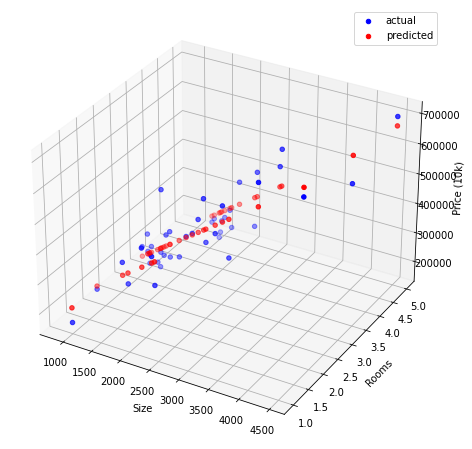

In [1478]:
#Vizualize actual vs predictions
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X[:,0], X[:,1], y, c="blue", label = "actual");
plt.xlabel("Size")
plt.ylabel("Rooms")
ax.set_zlabel("Price (10k)")

ax.scatter3D(X[:,0], X[:,1], y_pred, c="red", label = "predicted");
ax.legend()

In [1479]:
#Let's test the model on a new value
#Testing a new instance
y_test = np.array([2104.,3.]) 
y_test_scaled = np.array((y_test-mu)/sigma)
y_test_scaled = np.insert(y_test_scaled,0,1)
predict(y_test_scaled, params)

print("Price $", np.round(predict(y_test_scaled, params)[0],2))

Price $ 356283.07


In [1480]:
# Now let's look at the scikit-learn's implementation of 
# linear regression to see whether we get the correct answers

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

#Testing a new instance
y_test = np.array([[1650.,3.]])
model.predict(y_test)[0]

293081.46433489607

Let's now look at few measures that can be used to evaluate the linear regression models.

<b> R squared </b> : This is a goodness of fit measure which indicates the percentage of the variance in the dependent variable (i.e., housing price) that can be explained by the independent variables (i.e., size, rooms).

In [1481]:
def r_squared (y, y_pred):
    SSR = np.sum( (y - y_pred)**2 )
    TSS = np.sum( (y - np.mean(y))**2  )

    return 1 - (SSR/TSS)

In [1482]:
y = y_df.reshape(m,1)
r2 = r_squared(y, y_pred)
print("Rˆ2 is :" ,r2)

Rˆ2 is : 0.7329450180283257


This means that about 73% of the variations in housing prices can be explained by the size of the house and the number of rooms.

<b>Mean Squared Error </b>

In [1483]:
MSE = ( np.sum( (y_pred-y)**2 ) * (1./(2*m)))
MSE

2043280050.607332

<b>Regularized linear regression</b>

This is an implementation of regularized linear regression. So here we update the gradient dscent to add a regularization term.

In [1484]:
#Gradient Descent
def reg_gradient_discent(X, y, alpha, num_iter, lambdha=0.0001):

    cost_history = []

    #initialize theta
    theta_fin = np.zeros((X.shape[1]+1,1))

    #feature scaling
    X, mu, sigma = feature_scaling (X)
    

    #Adding all-ones column to X 
    X = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)

    
    #get prediction and compute cost for each iteration
    for i in range(1,num_iter+1):

        #prediction
        y_hat = predict(X, theta_fin)

        #Simulataniously update all theta
        for idx, j in enumerate(theta_fin):

            #Compute gradients
            #note - be sure that y_hat, y and X[:,idx] has the same shape

            #we donot penalize the fisrt column of X which are all ones
            if (idx == 0):
                gradient =   np.sum ( (y_hat.reshape(m,) - y) *  X[:,idx] ) *(1/m) 

            else:
                reg_term = ((lambdha/m) * j)
                gradient =   ((np.sum ( (y_hat.reshape(m,) - y) *  X[:,idx] ) ) *(1/m) ) + reg_term

            #Update theta
            theta_updated = j - (alpha * gradient)
            
            theta_fin [idx] = theta_updated
            


        #compute new cost with updated theta
        y_hat_new = predict(X, theta_fin)
        new_cost = compute_cost(y, y_hat_new.reshape(m,1), m)

        cost_history.append(new_cost)
    
        print("Iteration : ",i, "cost : ",new_cost)

    return cost_history, theta_fin, mu, sigma, X, y, y_hat_new




In [1485]:
lambdha = 1e-1
alpha = 0.02
num_iter = 1500

history_reg, params_reg, mu, sigma, X_df, y_df, y_pred_reg = reg_gradient_discent (X, y, alpha, num_iter, lambdha)

Iteration :  1 cost :  7859744109.013506
Iteration :  2 cost :  7651909614.622717
Iteration :  3 cost :  7651161410.4429035
Iteration :  4 cost :  7651158716.907862
Iteration :  5 cost :  7651158707.211132
Iteration :  6 cost :  7651158707.176223
Iteration :  7 cost :  7651158707.176098
Iteration :  8 cost :  7651158707.176098
Iteration :  9 cost :  7651158707.176097
Iteration :  10 cost :  7651158707.176098
Iteration :  11 cost :  7651158707.176101
Iteration :  12 cost :  7651158707.176098
Iteration :  13 cost :  7651158707.176097
Iteration :  14 cost :  7651158707.176097
Iteration :  15 cost :  7651158707.176097
Iteration :  16 cost :  7651158707.176097
Iteration :  17 cost :  7651158707.176097
Iteration :  18 cost :  7651158707.176097
Iteration :  19 cost :  7651158707.176097
Iteration :  20 cost :  7651158707.176097
Iteration :  21 cost :  7651158707.176097
Iteration :  22 cost :  7651158707.176097
Iteration :  23 cost :  7651158707.176097
Iteration :  24 cost :  7651158707.176097


In [1486]:
#Let's test the model on a new value
#Testing a new instance
y_test = np.array([1650.,3.])
y_test_scaled = np.array((y_test-mu)/sigma)
y_test_scaled = np.insert(y_test_scaled,0,1)
predict(y_test_scaled, params)

print("Price $", np.round(predict(y_test_scaled, params_reg)[0],2))

Price $ 340412.66


It is much easier to use vectorized form for computing the theta values using normal equation.

In [1487]:
#Normal equation
#Here i get X_df returned by the previous gradient discent function as it already as embedded all-ones feature.  
from numpy.linalg import inv

X = X_df
norm_theta = np.dot( inv ( np.dot(X.T,X )) , np.dot(X.T,y))


In [1488]:
#Prediction from normal equation method
print("Price $", np.round(predict(y_test_scaled, norm_theta)[0],2))

Price $ 293081.46
